In [1]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
elon =pd.read_csv('Elon_musk.csv', encoding = 'ISO-8859-1')


Saving Elon_musk.csv to Elon_musk.csv


In [2]:
elon.drop(['Unnamed: 0'], inplace = True, axis = 1)
elon.head()

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


In [3]:
elon.isnull().sum()

Text    0
dtype: int64

In [4]:
elon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    1999 non-null   object
dtypes: object(1)
memory usage: 15.7+ KB


#Data Cleaning

In [5]:
import re #regular expression
import string

def clean_text(Text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    Text = Text.lower()
    Text = re.sub('\[.*?\]', '', Text)
    Text = re.sub('[%s]' % re.escape(string.punctuation), '', Text)
    Text = re.sub('\w*\d\w*', '', Text)
    Text = re.sub("[0-9" "]+"," ",Text)
    Text = re.sub('[‘’“”…]', '', Text)
    return Text

clean = lambda x: clean_text(x)


In [6]:
elon['Text'] = elon['Text'] .apply(clean)
elon['Text'].head()

0                                         im an alien
1    idaacarmack ray tracing on cyberpunk with hdr ...
2                     joerogan spotify great interview
3                               doge is underestimated
4    teslacn congratulations tesla china for amazin...
Name: Text, dtype: object

In [7]:
#Word frequency
freq = pd.Series(' '.join(elon['Text']).split()).value_counts()[:20] # for top 20
freq

the               486
to                400
a                 355
is                355
of                315
spacex            239
in                219
amp               218
for               194
tesla             166
will              165
be                157
erdayastronaut    142
this              140
it                137
we                135
on                129
that              127
rt                127
but               126
dtype: int64

In [8]:
bc= ''.join(i for i in elon['Text'])
bc_text = '.'.join(bc.split('\n'))
bc_text

' i\x92m an alienidaacarmack ray tracing on cyberpunk with hdr is nextlevel have you tried itjoerogan spotify great interview doge is underestimatedteslacn congratulations tesla china for amazing execution last year now on to the next for even morehappy new year of the ox frodo was the underdoge.all thought he would fail.himself most of all httpstcozgxjfdzzrmowensparks flcnhvy  haha thanks flcnhvy  indeed tweets definitely do not represent realworld time allocationthe most entertaining outcome is the most likelygivedirectly just sent somejust agree to do clubhouse with kanyewestgeoffkeighley unrealengine it\x92s getting realbought some dogecoin for lil x so he can be a toddler hodlerjoshmanmode he definitely has issues but the sentencing seems a bit highfreewalletorg thanks for fixingfreewalletorg please unlock my accountastrojordy this is true power haha freewalletorg any crypto wallet that won\x92t give you your private keys should be avoided at all costsfreewalletorg your app sucksr

In [9]:
#removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
elon['Text'] = elon['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
elon['Text'].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


0                                            im alien
1    idaacarmack ray tracing cyberpunk hdr nextleve...
2                     joerogan spotify great interview
3                                  doge underestimated
4    teslacn congratulations tesla china amazing ex...
Name: Text, dtype: object

In [10]:
#word frequency after removal of stopwords
freq_Sw = pd.Series(' '.join(elon['Text']).split()).value_counts()[:20] # for top 20
freq_Sw.head()

spacex            239
amp               218
tesla             166
erdayastronaut    142
rt                127
dtype: int64

In [11]:
from google.colab import files
uploaded=files.upload()

Saving positive-words.txt to positive-words.txt


In [12]:
from google.colab import files
uploaded=files.upload()

Saving negative-words.txt to negative-words.txt


In [13]:
from google.colab import files
uploaded=files.upload()

Saving stop.txt to stop.txt


In [14]:
import spacy

nlp = spacy.load('en_core_web_sm')
file_path1 = 'positive-words.txt'
file_path2 = 'negative-words.txt'
file_path3 = 'stop.txt'

with open(file_path1, 'r', encoding='utf-8') as file1:
    text1 = file1.read()

positive_words = nlp(text1)  # Process the text using spaCy

with open(file_path2, 'r', encoding='utf-8', errors='replace') as file2:
    text2 = file2.read()

negative_words = nlp(text2)  # Process the text using spaCy

with open(file_path3, 'r', encoding='utf-8') as file3:
    text3 = file3.read()

stop_words = nlp(text3)  # Process the text using spaCy


In [15]:
positive_words = [token.text for token in positive_words]
negative_words = [token.text for token in negative_words]
stop_words = [token.text for token in stop_words]

In [16]:
elon.head()

,Text
0,im alien
1,idaacarmack ray tracing cyberpunk hdr nextleve...
2,joerogan spotify great interview
3,doge underestimated
4,teslacn congratulations tesla china amazing ex...


In [17]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize


# Function to calculate sentiment score for a tweet
def calculate_sentiment(Text):
    tokens = word_tokenize(Text.lower())  # Tokenize and convert to lowercase
    sentiment_score = sum(1 if word in positive_words else -1 if word in negative_words else 0 for word in tokens)
    return sentiment_score

# Apply sentiment analysis to each tweet
elon['Sentiment_Score'] = elon['Text'].apply(calculate_sentiment)

# Calculate the overall sentiment score
overall_sentiment_score = elon['Sentiment_Score'].sum()

print("Overall Sentiment Score:", overall_sentiment_score)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Overall Sentiment Score: 714


## ---------------------------------

In [18]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import string
import spacy

from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

#Text Preprocessing

In [19]:
elon=[Text.strip() for Text in elon.Text] # remove both the leading and the trailing characters
elon=[Text for Text in elon if Text] # removes empty strings, because they are considered in Python as False
elon[0:10]

['i\x92m alien',
 'idaacarmack ray tracing cyberpunk hdr nextlevel tried',
 'joerogan spotify great interview',
 'doge underestimated',
 'teslacn congratulations tesla china amazing execution last year next even',
 'happy new year ox',
 'frodo underdoge thought would fail httpstcozgxjfdzzrm',
 'owensparks flcnhvy haha thanks',
 'flcnhvy indeed tweets definitely represent realworld time allocation',
 'entertaining outcome likely']

In [20]:
# Joining the list into one string/text
tweets_text=' '.join(elon)
tweets_text

'i\x92m alien idaacarmack ray tracing cyberpunk hdr nextlevel tried joerogan spotify great interview doge underestimated teslacn congratulations tesla china amazing execution last year next even happy new year ox frodo underdoge thought would fail httpstcozgxjfdzzrm owensparks flcnhvy haha thanks flcnhvy indeed tweets definitely represent realworld time allocation entertaining outcome likely givedirectly sent agree clubhouse kanyewest geoffkeighley unrealengine it\x92s getting real bought dogecoin lil x toddler hodler joshmanmode definitely issues sentencing seems bit high freewalletorg thanks fixing freewalletorg please unlock account astrojordy true power haha freewalletorg crypto wallet won\x92t give private keys avoided costs freewalletorg app sucks rt spacex nasa selected falcon heavy launch first two elements lunar gateway together one mission ajtourville yes rationaletienne adamklotz predict cash flow reasonably well starlink ipo rationaletienne adamklotz starlink staggeringly d

In [21]:
# remove Twitter username handles from a given twitter text. (Removes @usernames)
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer(strip_handles=True)
tweets_tokens=tknzr.tokenize(tweets_text)
print(tweets_tokens)

['i', '\x92', 'm', 'alien', 'idaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'tried', 'joerogan', 'spotify', 'great', 'interview', 'doge', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'next', 'even', 'happy', 'new', 'year', 'ox', 'frodo', 'underdoge', 'thought', 'would', 'fail', 'httpstcozgxjfdzzrm', 'owensparks', 'flcnhvy', 'haha', 'thanks', 'flcnhvy', 'indeed', 'tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'entertaining', 'outcome', 'likely', 'givedirectly', 'sent', 'agree', 'clubhouse', 'kanyewest', 'geoffkeighley', 'unrealengine', 'it', '\x92', 's', 'getting', 'real', 'bought', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'joshmanmode', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'high', 'freewalletorg', 'thanks', 'fixing', 'freewalletorg', 'please', 'unlock', 'account', 'astrojordy', 'true', 'power', 'haha', 'freewalletorg', 'crypto', 'wallet', 'won', '\x92', 't', 'giv

In [22]:
# Again Joining the list into one string/text
tweets_tokens_text=' '.join(tweets_tokens)
tweets_tokens_text

'i \x92 m alien idaacarmack ray tracing cyberpunk hdr nextlevel tried joerogan spotify great interview doge underestimated teslacn congratulations tesla china amazing execution last year next even happy new year ox frodo underdoge thought would fail httpstcozgxjfdzzrm owensparks flcnhvy haha thanks flcnhvy indeed tweets definitely represent realworld time allocation entertaining outcome likely givedirectly sent agree clubhouse kanyewest geoffkeighley unrealengine it \x92 s getting real bought dogecoin lil x toddler hodler joshmanmode definitely issues sentencing seems bit high freewalletorg thanks fixing freewalletorg please unlock account astrojordy true power haha freewalletorg crypto wallet won \x92 t give private keys avoided costs freewalletorg app sucks rt spacex nasa selected falcon heavy launch first two elements lunar gateway together one mission ajtourville yes rationaletienne adamklotz predict cash flow reasonably well starlink ipo rationaletienne adamklotz starlink staggeri

In [23]:
# Remove Punctuations
no_punc_text=tweets_tokens_text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'i \x92 m alien idaacarmack ray tracing cyberpunk hdr nextlevel tried joerogan spotify great interview doge underestimated teslacn congratulations tesla china amazing execution last year next even happy new year ox frodo underdoge thought would fail httpstcozgxjfdzzrm owensparks flcnhvy haha thanks flcnhvy indeed tweets definitely represent realworld time allocation entertaining outcome likely givedirectly sent agree clubhouse kanyewest geoffkeighley unrealengine it \x92 s getting real bought dogecoin lil x toddler hodler joshmanmode definitely issues sentencing seems bit high freewalletorg thanks fixing freewalletorg please unlock account astrojordy true power haha freewalletorg crypto wallet won \x92 t give private keys avoided costs freewalletorg app sucks rt spacex nasa selected falcon heavy launch first two elements lunar gateway together one mission ajtourville yes rationaletienne adamklotz predict cash flow reasonably well starlink ipo rationaletienne adamklotz starlink staggeri

In [24]:
# remove https or url within text
import re
no_url_text=re.sub(r'http\S+', '', no_punc_text)
no_url_text

'i \x92 m alien idaacarmack ray tracing cyberpunk hdr nextlevel tried joerogan spotify great interview doge underestimated teslacn congratulations tesla china amazing execution last year next even happy new year ox frodo underdoge thought would fail  owensparks flcnhvy haha thanks flcnhvy indeed tweets definitely represent realworld time allocation entertaining outcome likely givedirectly sent agree clubhouse kanyewest geoffkeighley unrealengine it \x92 s getting real bought dogecoin lil x toddler hodler joshmanmode definitely issues sentencing seems bit high freewalletorg thanks fixing freewalletorg please unlock account astrojordy true power haha freewalletorg crypto wallet won \x92 t give private keys avoided costs freewalletorg app sucks rt spacex nasa selected falcon heavy launch first two elements lunar gateway together one mission ajtourville yes rationaletienne adamklotz predict cash flow reasonably well starlink ipo rationaletienne adamklotz starlink staggeringly difficult tec

In [25]:
from nltk.tokenize import word_tokenize
import nltk

# Download the punkt tokenizer data
nltk.download('punkt')

text_tokens=word_tokenize(no_url_text)
print(text_tokens)

['i', '\x92', 'm', 'alien', 'idaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'tried', 'joerogan', 'spotify', 'great', 'interview', 'doge', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'next', 'even', 'happy', 'new', 'year', 'ox', 'frodo', 'underdoge', 'thought', 'would', 'fail', 'owensparks', 'flcnhvy', 'haha', 'thanks', 'flcnhvy', 'indeed', 'tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'entertaining', 'outcome', 'likely', 'givedirectly', 'sent', 'agree', 'clubhouse', 'kanyewest', 'geoffkeighley', 'unrealengine', 'it', '\x92', 's', 'getting', 'real', 'bought', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'joshmanmode', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'high', 'freewalletorg', 'thanks', 'fixing', 'freewalletorg', 'please', 'unlock', 'account', 'astrojordy', 'true', 'power', 'haha', 'freewalletorg', 'crypto', 'wallet', 'won', '\x92', 't', 'give', 'private', 'keys',

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [26]:
# Tokenization

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
# Tokens count
len(text_tokens)

13956

In [30]:
# Remove Stopwords
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

sw_list = ['\x92','rt','ye','yeah','haha','Yes','U0001F923','I']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['alien', 'idaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'tried', 'joerogan', 'spotify', 'great', 'interview', 'doge', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'next', 'even', 'happy', 'new', 'year', 'ox', 'frodo', 'underdoge', 'thought', 'would', 'fail', 'owensparks', 'flcnhvy', 'thanks', 'flcnhvy', 'indeed', 'tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'entertaining', 'outcome', 'likely', 'givedirectly', 'sent', 'agree', 'clubhouse', 'kanyewest', 'geoffkeighley', 'unrealengine', 'getting', 'real', 'bought', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'joshmanmode', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'high', 'freewalletorg', 'thanks', 'fixing', 'freewalletorg', 'please', 'unlock', 'account', 'astrojordy', 'true', 'power', 'freewalletorg', 'crypto', 'wallet', 'give', 'private', 'keys', 'avoided', 'costs', 'freewalletorg', 'app', 'sucks', 'spacex', 'nasa', '

In [32]:
# Normalize the data
lower_words=[Text.lower() for Text in no_stop_tokens]
print(lower_words[100:200])

['gateway', 'together', 'one', 'mission', 'ajtourville', 'yes', 'rationaletienne', 'adamklotz', 'predict', 'cash', 'flow', 'reasonably', 'well', 'starlink', 'ipo', 'rationaletienne', 'adamklotz', 'starlink', 'staggeringly', 'difficult', 'technical', 'amp', 'economic', 'endeavor', 'however', 'rationaletienne', 'adamklotz', 'spacex', 'needs', 'pass', 'deep', 'chasm', 'negative', 'cash', 'flow', 'next', 'year', 'idaacarmack', 'lowest', 'cost', 'per', 'ton', 'carbon', 'sequestered', 'net', 'value', 'product', 'made', 'must', 'scalable', 'g', 'adamklotz', 'meant', 'price', 'countries', 'difference', 'taxes', 'amp', 'shipping', 'tobyliiiiiiiiii', 'intended', 'earth', 'may', 'ideas', 'apply', 'mars', 'cryptoshrikar', 'coindesk', 'tesla', 'danzpalmer', 'xprize', 'team', 'manage', 'carbon', 'capture', 'prize', 'sruhle', 'everyone', 'tesla', 'receives', 'stock', 'comp', 'stockoptions', 'take', 'table', 'missing', 'back', 'work', 'go', 'capybarasurfer', 'seem', 'bit', 'high', 'itsallrisky', 'doge

In [33]:
# Stemming (Optional)
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens[100:200])

['gateway', 'togeth', 'one', 'mission', 'ajtourvil', 'ye', 'rationaletienn', 'adamklotz', 'predict', 'cash', 'flow', 'reason', 'well', 'starlink', 'ipo', 'rationaletienn', 'adamklotz', 'starlink', 'staggeringli', 'difficult', 'technic', 'amp', 'econom', 'endeavor', 'howev', 'rationaletienn', 'adamklotz', 'spacex', 'need', 'pass', 'deep', 'chasm', 'neg', 'cash', 'flow', 'next', 'year', 'idaacarmack', 'lowest', 'cost', 'per', 'ton', 'carbon', 'sequest', 'net', 'valu', 'product', 'made', 'must', 'scalabl', 'g', 'adamklotz', 'meant', 'price', 'countri', 'differ', 'tax', 'amp', 'ship', 'tobyliiiiiiiiii', 'intend', 'earth', 'may', 'idea', 'appli', 'mar', 'cryptoshrikar', 'coindesk', 'tesla', 'danzpalm', 'xprize', 'team', 'manag', 'carbon', 'captur', 'prize', 'sruhl', 'everyon', 'tesla', 'receiv', 'stock', 'comp', 'stockopt', 'take', 'tabl', 'miss', 'back', 'work', 'go', 'capybarasurf', 'seem', 'bit', 'high', 'itsallriski', 'doge', 'appear', 'inflationari', 'meaning', 'fix', 'coin']


In [34]:
# Lemmatization
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

alien idaacarmack ray tracing cyberpunk hdr nextlevel tried joerogan spotify great interview doge underestimated teslacn congratulations tesla china amazing execution last year next even happy new year ox frodo underdoge thought would fail owensparks flcnhvy thanks flcnhvy indeed tweets definitely represent realworld time allocation entertaining outcome likely givedirectly sent agree clubhouse kanyewest geoffkeighley unrealengine getting real bought dogecoin lil x toddler hodler joshmanmode definitely issues sentencing seems bit high freewalletorg thanks fixing freewalletorg please unlock account astrojordy true power freewalletorg crypto wallet give private keys avoided costs freewalletorg app sucks spacex nasa selected falcon heavy launch first two elements lunar gateway together one mission ajtourville yes rationaletienne adamklotz predict cash flow reasonably well starlink ipo rationaletienne adamklotz starlink staggeringly difficult technical amp economic endeavor however rational

In [36]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'try', 'joerogan', 'spotify', 'great', 'interview', 'doge', 'underestimate', 'teslacn', 'congratulation', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'next', 'even', 'happy', 'new', 'year', 'ox', 'frodo', 'underdoge', 'thought', 'would', 'fail', 'owenspark', 'flcnhvy', 'thanks', 'flcnhvy', 'indeed', 'tweet', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'entertain', 'outcome', 'likely', 'givedirectly', 'send', 'agree', 'clubhouse', 'kanyewest', 'geoffkeighley', 'unrealengine', 'get', 'real', 'buy', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'joshmanmode', 'definitely', 'issue', 'sentencing', 'seem', 'bit', 'high', 'freewalletorg', 'thank', 'fix', 'freewalletorg', 'please', 'unlock', 'account', 'astrojordy', 'true', 'power', 'freewalletorg', 'crypto', 'wallet', 'give', 'private', 'key', 'avoid', 'cost', 'freewalletorg', 'app', 'suck', 'spacex', 'nasa', 'select', 'falcon', 'heavy', '

In [37]:
clean_tweets=' '.join(lemmas)
clean_tweets

'alien idaacarmack ray trace cyberpunk hdr nextlevel try joerogan spotify great interview doge underestimate teslacn congratulation tesla china amazing execution last year next even happy new year ox frodo underdoge thought would fail owenspark flcnhvy thanks flcnhvy indeed tweet definitely represent realworld time allocation entertain outcome likely givedirectly send agree clubhouse kanyewest geoffkeighley unrealengine get real buy dogecoin lil x toddler hodler joshmanmode definitely issue sentencing seem bit high freewalletorg thank fix freewalletorg please unlock account astrojordy true power freewalletorg crypto wallet give private key avoid cost freewalletorg app suck spacex nasa select falcon heavy launch first two element lunar gateway together one mission ajtourville yes rationaletienne adamklotz predict cash flow reasonably well starlink ipo rationaletienne adamklotz starlink staggeringly difficult technical amp economic endeavor however rationaletienne adamklotz spacex need p

# Feature Extaction

## 1. Using CountVectorizer

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
tweetscv=cv.fit_transform(lemmas)

In [39]:
print(cv.vocabulary_)

{'alien': 100, 'idaacarmack': 1564, 'ray': 2655, 'trace': 3472, 'cyberpunk': 785, 'hdr': 1459, 'nextlevel': 2218, 'try': 3507, 'joerogan': 1732, 'spotify': 3114, 'great': 1402, 'interview': 1670, 'doge': 931, 'underestimate': 3556, 'teslacn': 3328, 'congratulation': 683, 'tesla': 3322, 'china': 572, 'amazing': 124, 'execution': 1133, 'last': 1818, 'year': 3795, 'next': 2217, 'even': 1105, 'happy': 1443, 'new': 2214, 'ox': 2360, 'frodo': 1292, 'underdoge': 3555, 'thought': 3397, 'would': 3775, 'fail': 1167, 'owenspark': 2356, 'flcnhvy': 1237, 'thanks': 3364, 'indeed': 1610, 'tweet': 3526, 'definitely': 836, 'represent': 2735, 'realworld': 2678, 'time': 3415, 'allocation': 104, 'entertain': 1062, 'outcome': 2337, 'likely': 1877, 'givedirectly': 1374, 'send': 2910, 'agree': 74, 'clubhouse': 612, 'kanyewest': 1761, 'geoffkeighley': 1354, 'unrealengine': 3583, 'get': 1359, 'real': 2667, 'buy': 474, 'dogecoin': 933, 'lil': 1878, 'toddler': 3438, 'hodler': 1509, 'joshmanmode': 1741, 'issue': 

In [40]:
print(tweetscv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [41]:
print(tweetscv.toarray().shape)

(12876, 3823)


## 2. CountVectorizer with N-grams (Bigrams & Trigrams)

In [42]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [43]:
print(bow_matrix_ngram.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


##3- TF-IDF Vectorizer

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)

In [45]:
print(tfidf_matix_ngram.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Generate Word Cloud

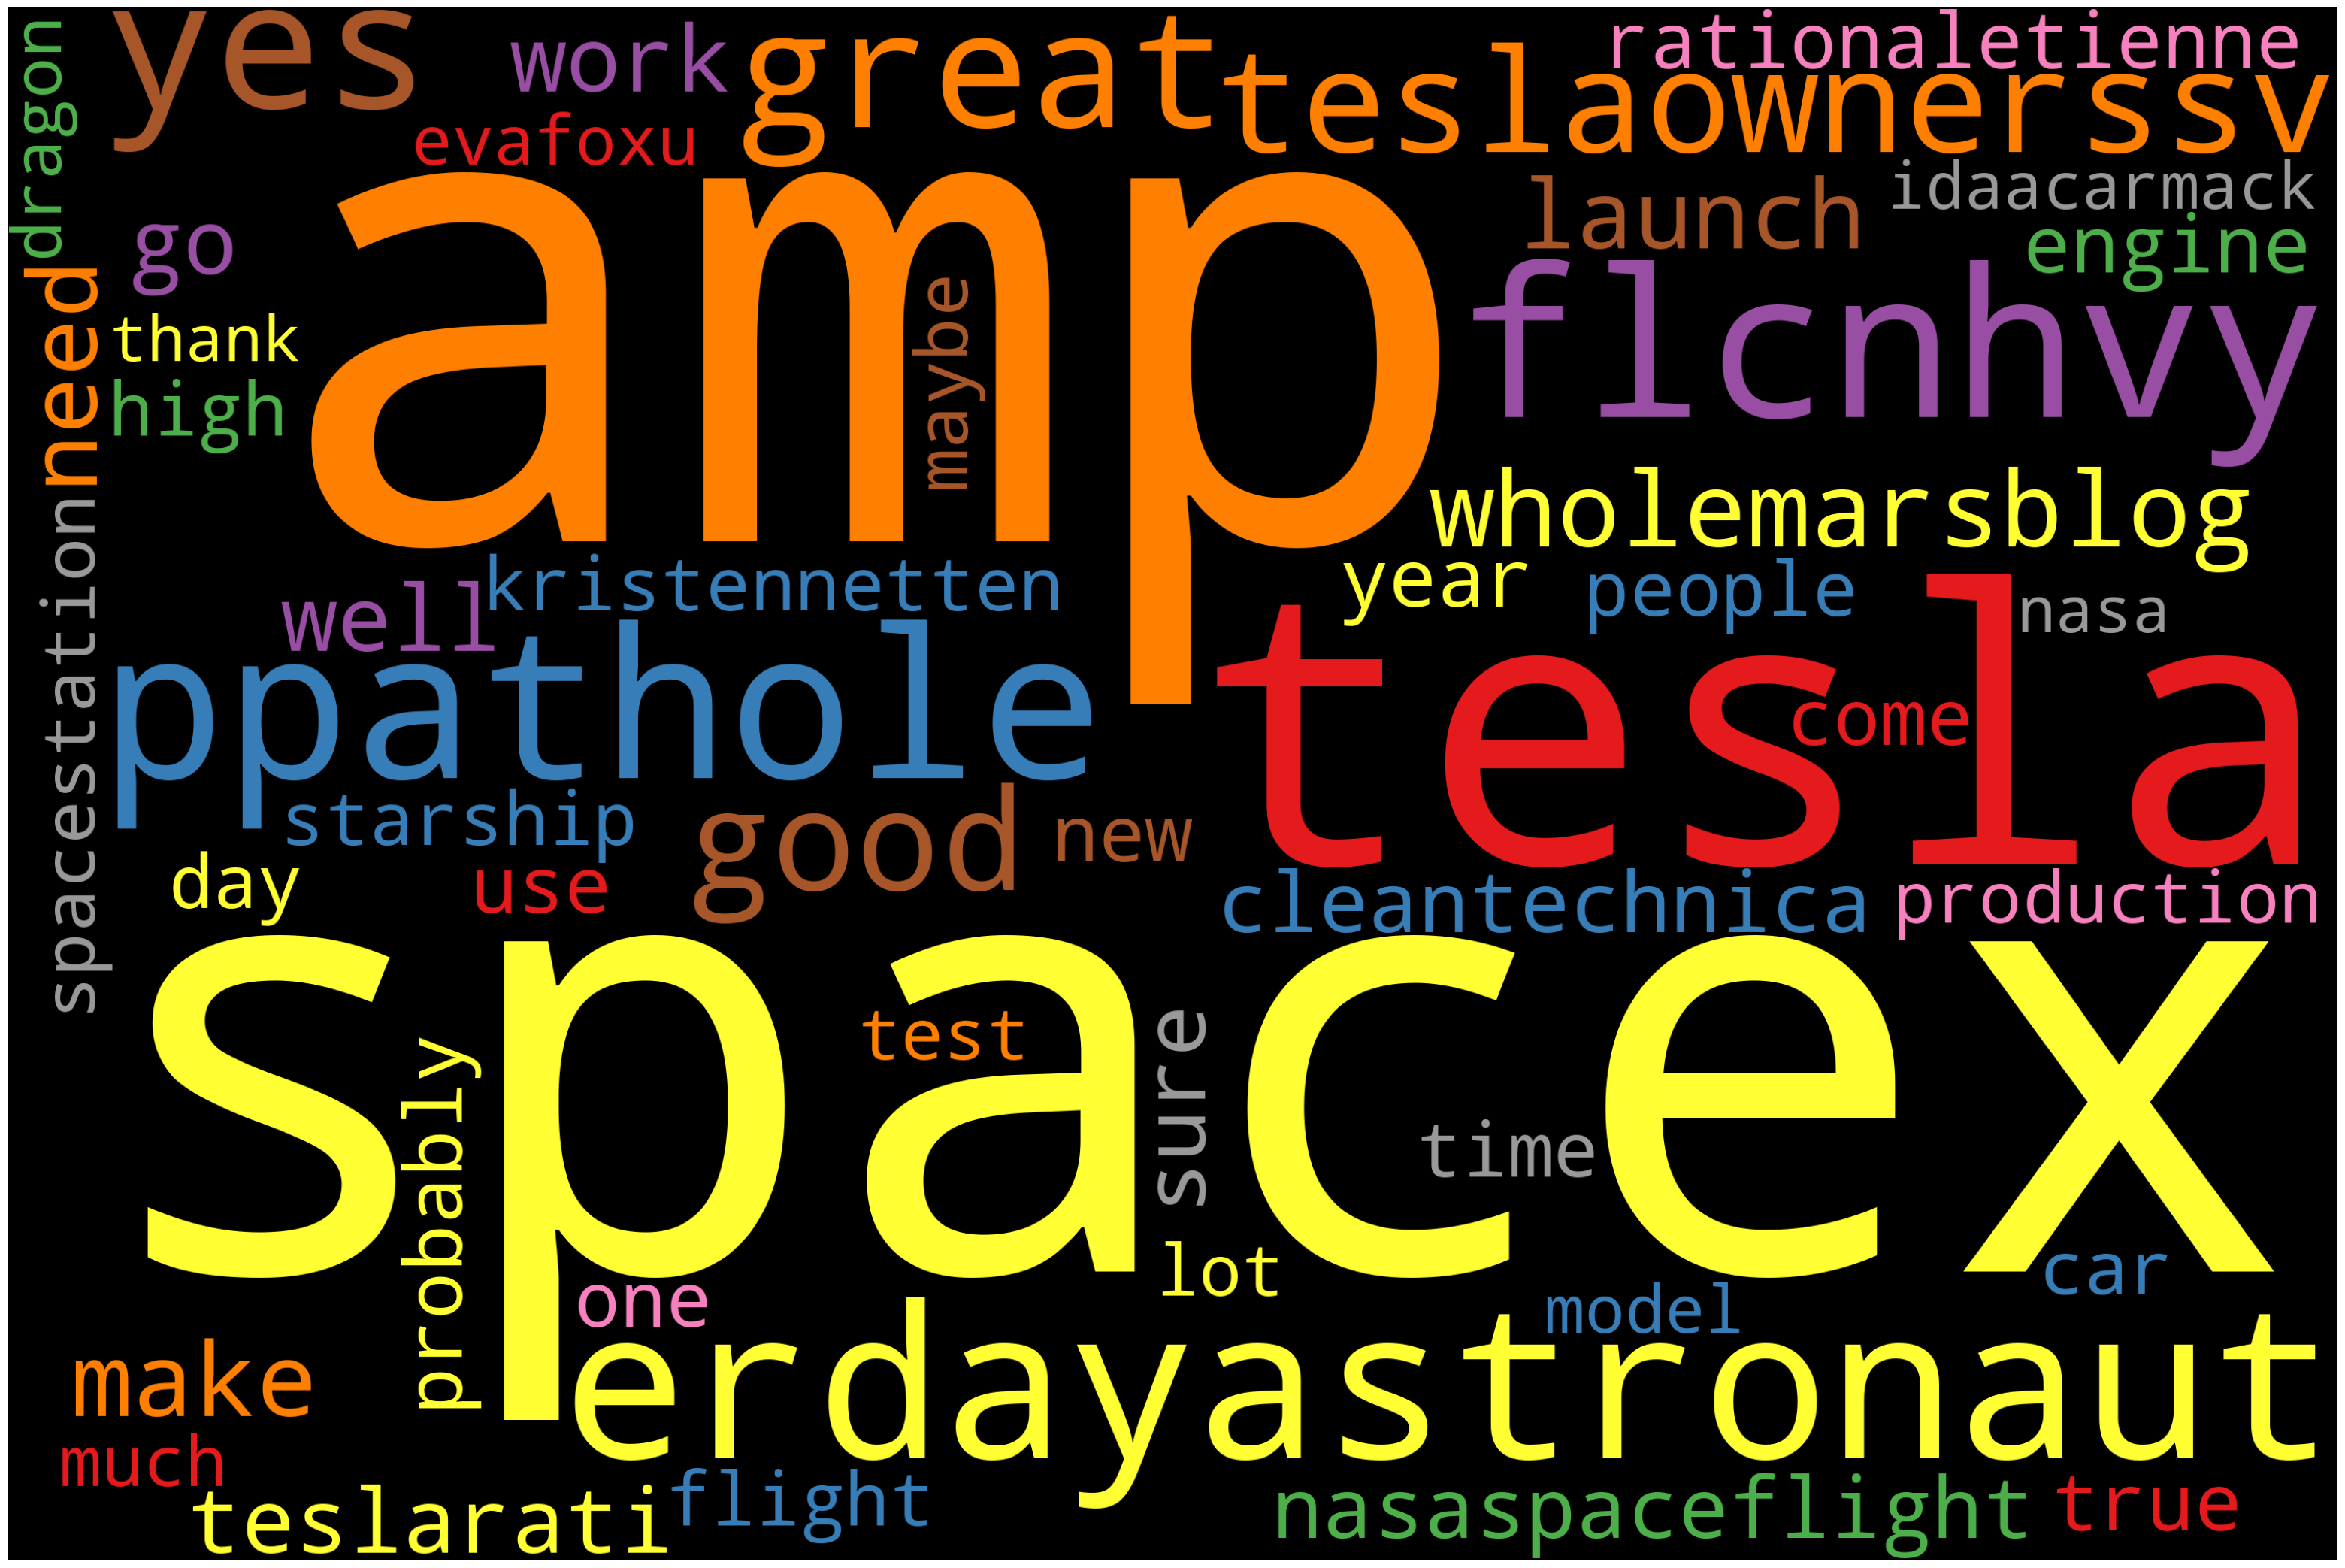

In [46]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

# Generate Word Cloud

STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=50,
                   colormap='Set1',stopwords=STOPWORDS).generate(clean_tweets)
plot_cloud(wordcloud)

## Named Entity Recognition (NER)

In [ ]:
# Parts Of Speech (POS) Tagging
nlp=spacy.load('en_core_web_sm')

one_block=clean_tweets
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [ ]:
for token in doc_block[100:200]:
    print(token,token.pos_)

once ADV
predict VERB
cash NOUN
flow NOUN
reasonably ADV
well ADV
starlink NOUN
ipo PROPN
starlink NOUN
staggeringly ADV
difficult ADJ
technical ADJ
economic ADJ
endeavor NOUN
however ADV
spacex VERB
need AUX
pass VERB
deep ADJ
chasm ADJ
negative ADJ
cash NOUN
flow NOUN
next ADJ
year NOUN
low ADJ
cost NOUN
per ADP
ton NOUN
carbon NOUN
sequester NOUN
net ADJ
value NOUN
product NOUN
make VERB
must AUX
scalable VERB
g ADP
it PRON
mean VERB
price NOUN
country NOUN
only ADV
difference NOUN
taxis NOUN
ship NOUN
this PRON
intend VERB
earth NOUN
may AUX
idea NOUN
apply VERB
mar PROPN
xprize PROPN
team NOUN
manage VERB
100 NUM
m PROPN
carbon NOUN
capture NOUN
prize NOUN
everyone PRON
tesla NOUN
receive VERB
stock NOUN
my PRON
comp NOUN
stock NOUN
option NOUN
take VERB
table NOUN
that PRON
miss VERB
back ADP
work NOUN
go VERB
do AUX
seem VERB
bit NOUN
high ADJ
doge PROPN
appear VERB
inflationary ADJ
meaningfully ADV
fix VERB
coin PROPN
per ADP
unit NOUN
time NOUN
whereas SCONJ
wow INTJ
1 NUM
orb

In [ ]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['time', 'launch', 'tower', 'stack', 'raptor', 'orbit', 'booster', 'improve', 'ship', 'booster', 'mass', 'back', 'work', 'tonight', 'video', 'people', 'speak', 'cute', 'image', 'reflect', 'time', 'cost', 'people', 'rain', 'pain', 'u0001f3b6', 'let', 'doge', 'rainforest', 'come', 'crypto', 'simplicity', 'genius', 'decade', 'work', 'look', 'note', 'email', 'text', 'lesson', 'learn', 'earth', 'time', 'tell', 'story', 'tesla', 'read', 'kingdom', 'hear', 'name', 'year', 'dogecake', 'thing', 'restaurant', 'hang', 'currency', 'earth', 'scratch', 'destiny', 'franz', 'say', 'ship', 'landing', 'burn', 'solution', 'greate', 'use', 'gas', 'maneuvering', 'rcs', 'thruster', 'seem', 'raptor', 'launch', 'mission', 'collect', 'datum', 'galaxy', 'explore', 'launch', 'starlink', 'satellite', 'orbit', 'mission', 'pad', '39a', 'deck', 'default', 'engine', 'lever', 'arm', 'shut', 'engine', 'min', 'throttle', 'point', 'flameout', 'risk', 'start', 'engine']


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,tesla,76
1,make,64
2,launch,62
3,year,49
4,work,49
5,need,48
6,go,43
7,come,42
8,day,38
9,get,37


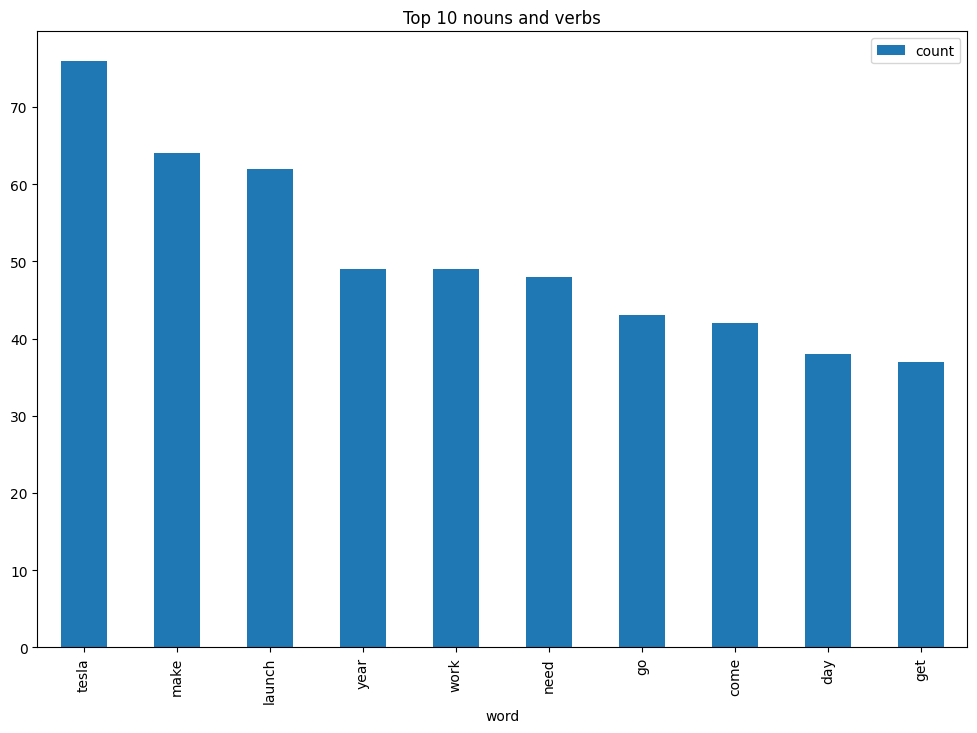

In [ ]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');

## Emotion Mining - Sentiment Analysis

In [ ]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(elon))
sentences

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [ ]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
922,"@kenyanwalstreet Not actually a payout, just a..."
923,"It may never pay out, as the stock cant b ht..."
924,Details Aug 28.
925,AI symbiosis while u wait @vistacruiser7 @flcn...


In [ ]:
# Emotion Lexicon - Affin
affin=pd.read_csv('/content/8.3-NLP_Afinn.csv',sep=',',encoding='Latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [ ]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [ ]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [ ]:
# manual testing
calculate_sentiment(text='great')

3

In [ ]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0      0
1      0
2      3
3      3
4      0
      ..
922    0
923   -4
924    0
925   -2
926    0
Name: sentiment_value, Length: 927, dtype: int64

In [ ]:
# how many words are there in a sentence?
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0      13
1       4
2       4
3      13
4       8
       ..
922    11
923    31
924     3
925    47
926    15
Name: word_count, Length: 927, dtype: int64

In [ ]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count
840,Cool Model 3 review by @iamjamiefoxx https://t...,-8,61
650,Very ba https://t.co/tJsh1Exz1Q @justpaulinel...,-8,60
64,"Also, the road to hell is mostly paved with ba...",-7,11
923,"It may never pay out, as the stock cant b ht...",-4,31
683,"Occasional flights from land are ok, but frequ...",-4,39
...,...,...,...
648,Its https://t.co/IxhyT6NuiC @Teslarati Tesla...,13,65
588,The open areas https://t.co/rabjKrtQlw @Sav...,14,138
105,@Erdayastronaut @SpaceX Was also thinking that...,16,94
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",16,231


In [ ]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    927.000000
mean       1.348436
std        2.688761
min       -8.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       17.000000
Name: sentiment_value, dtype: float64

In [ ]:
# negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13
1,Have you tried it?,0,4
4,Now on to the next for even more!!,0,8
5,Happy New Year of the Ox!,0,6
6,https://t.co/9WFKMYu2oj Frodo was the underdog...,-2,14
...,...,...,...
922,"@kenyanwalstreet Not actually a payout, just a...",0,11
923,"It may never pay out, as the stock cant b ht...",-4,31
924,Details Aug 28.,0,3
925,AI symbiosis while u wait @vistacruiser7 @flcn...,-2,47


In [ ]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

,sentence,sentiment_value,word_count
2,@joerogan @Spotify Great interview!,3,4
3,@gtera27 Doge is underestimated @teslacn Congr...,3,13
7,https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy ...,2,10
9,The most entertaining outcome is the most like...,3,109
17,Back to work I go @CapybaraSurfer @MattWallace...,4,38
...,...,...,...
914,He was one of the very best.,3,7
916,"@Ali_Afshari In general, we need to improve ho...",4,87
918,"@burakaydik True Wow, IHOP &amp; GitHub are cl...",3,15
920,This is both great &amp; terrifying.,3,6


In [ ]:
# Adding index cloumn
sent_df['index']=range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13,0
1,Have you tried it?,0,4,1
2,@joerogan @Spotify Great interview!,3,4,2
3,@gtera27 Doge is underestimated @teslacn Congr...,3,13,3
4,Now on to the next for even more!!,0,8,4
...,...,...,...,...
922,"@kenyanwalstreet Not actually a payout, just a...",0,11,922
923,"It may never pay out, as the stock cant b ht...",-4,31,923
924,Details Aug 28.,0,3,924
925,AI symbiosis while u wait @vistacruiser7 @flcn...,-2,47,925


<ipython-input-57-aa15d41db3a0>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sent_df['sentiment_value'])


<Axes: xlabel='sentiment_value', ylabel='Density'>

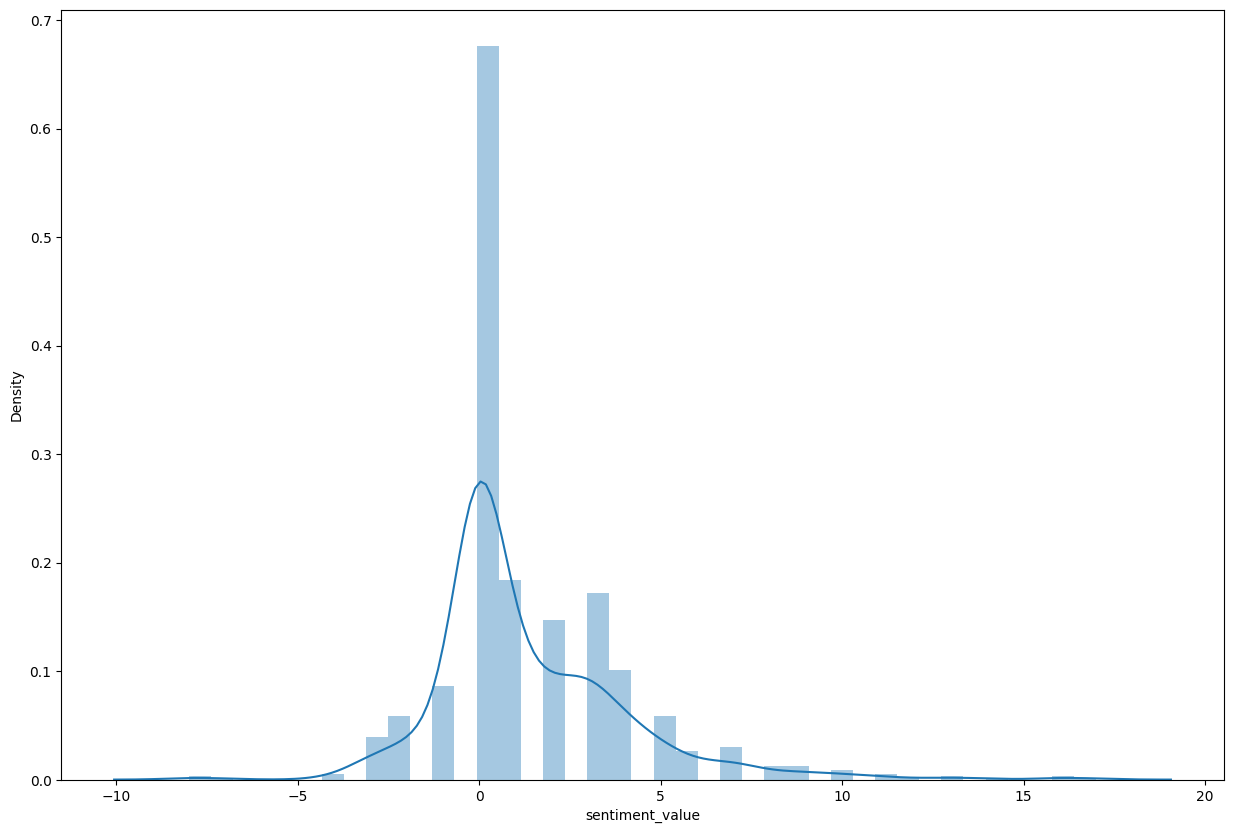

In [ ]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])

<Axes: xlabel='index', ylabel='sentiment_value'>

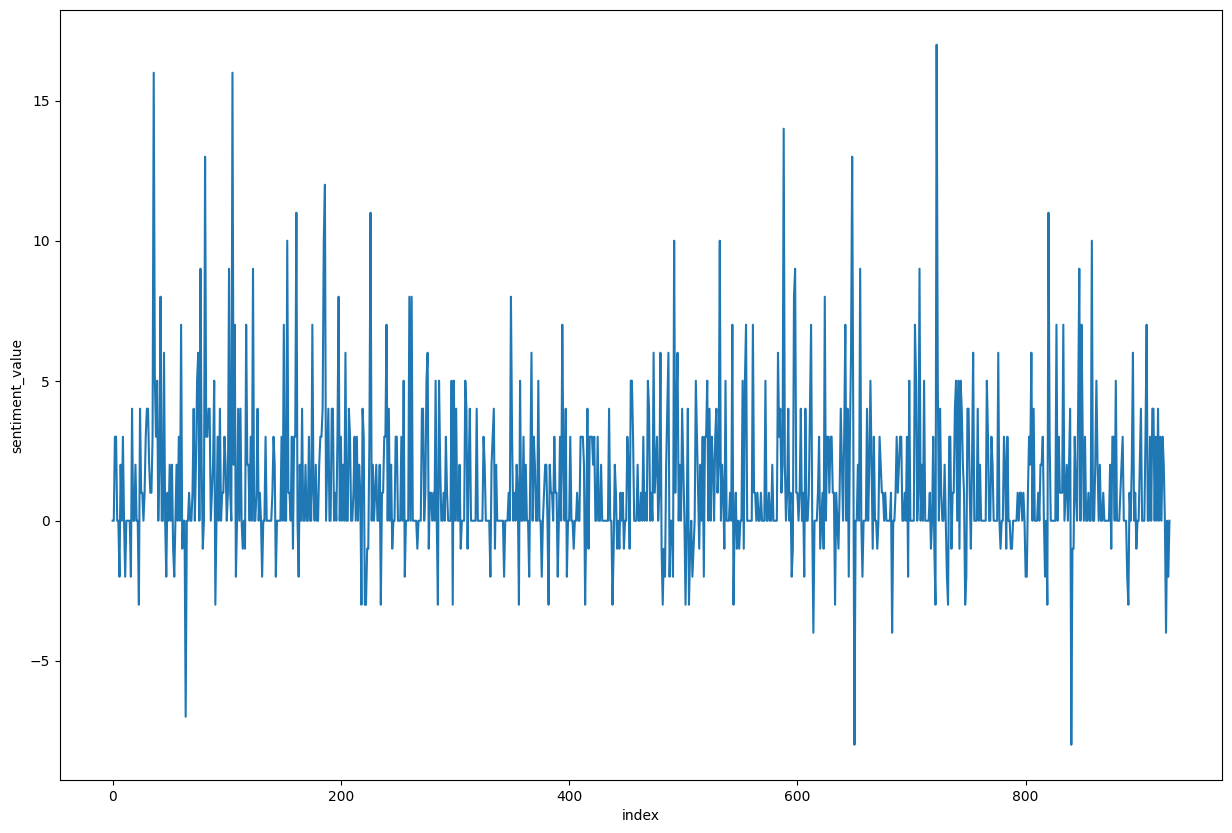

In [ ]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<Axes: title={'center': 'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

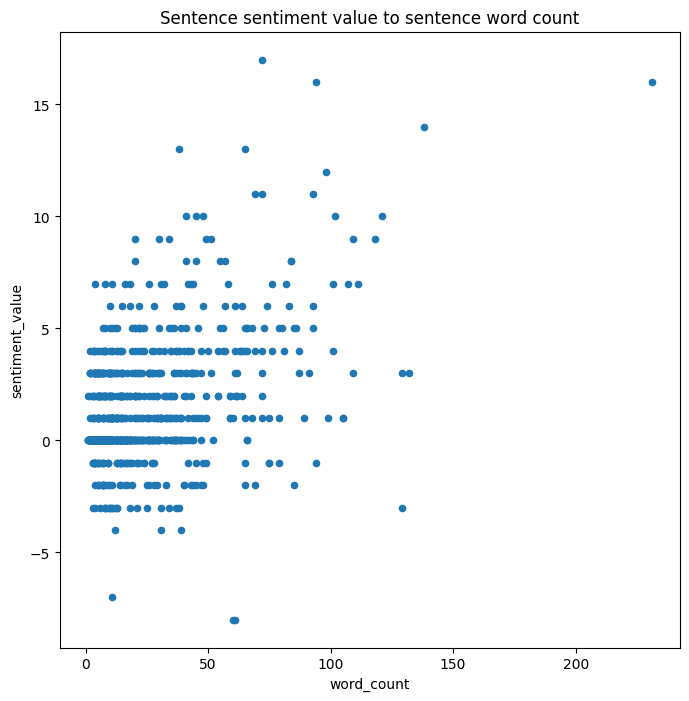

In [ ]:
# Correlation analysis
sent_df.plot.scatter(x='word_count',y='sentiment_value',figsize=(8,8),title='Sentence sentiment value to sentence word count')
